In [1]:
# FSW方法的代码，计算结果存储在 output/SAP/SAP_FSW.txt中

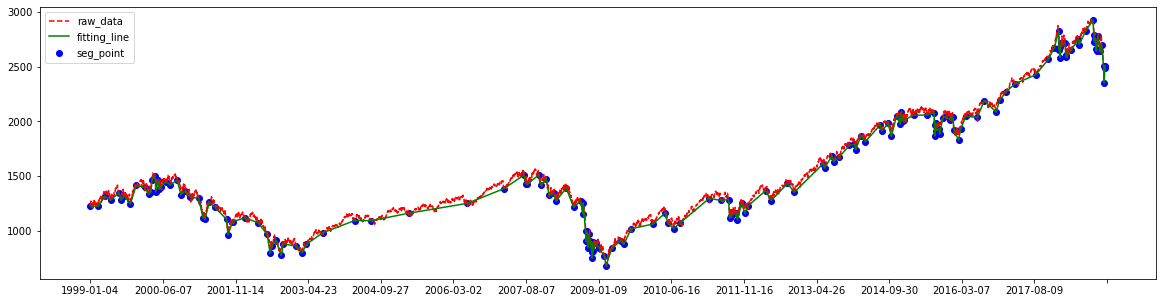

the FSW vertical fitting error:  8773.438460615564
Running time: 1.7852100999999934 Seconds


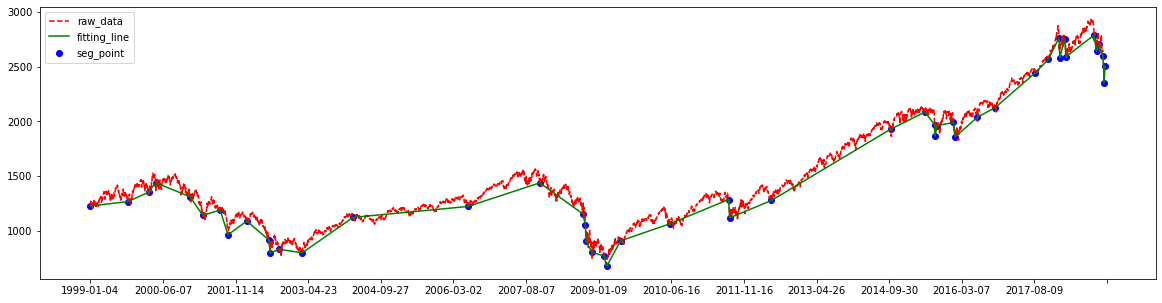

the FSW vertical fitting error:  654.9108381790933
Running time: 1.7648129999999966 Seconds


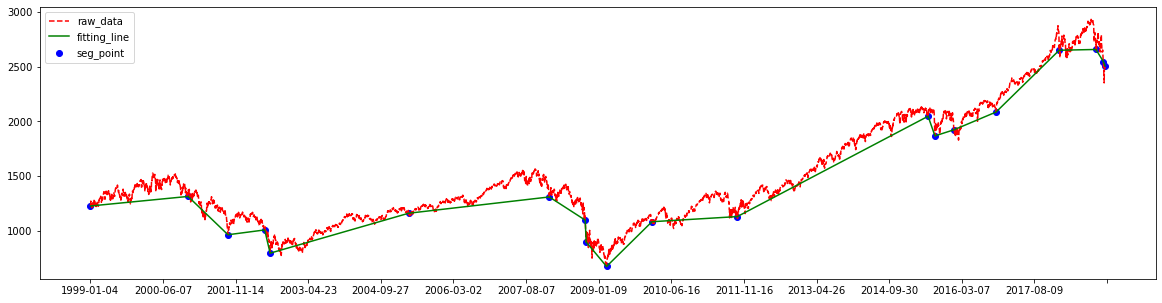

the FSW vertical fitting error:  970.2468446118339
Running time: 1.5853444000000039 Seconds


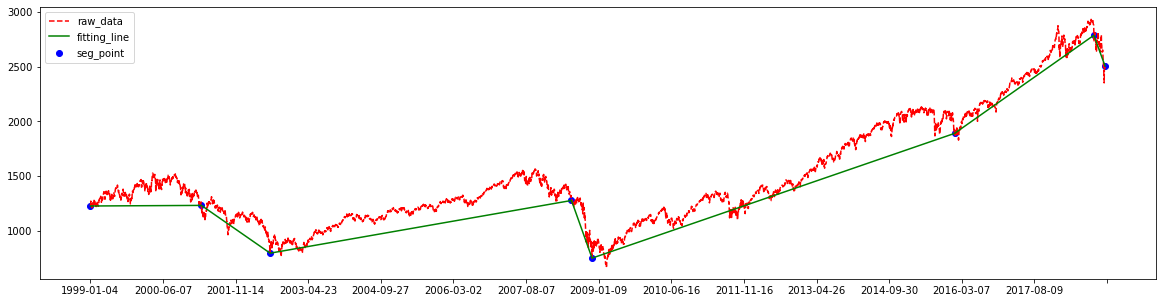

the FSW vertical fitting error:  1452.256956471711
Running time: 1.2780030999999994 Seconds


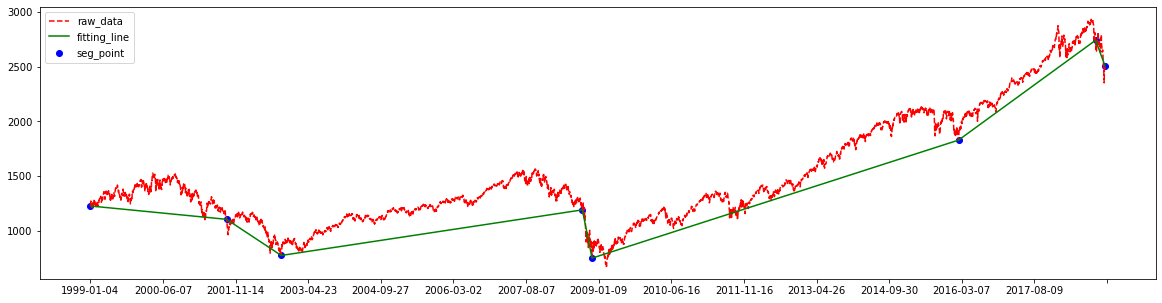

the FSW vertical fitting error:  1905.956552863541
Running time: 1.3173354999999987 Seconds


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 16 09:02:59 2020

@author:Jacky

Algorithm 3.2  Feasible Space Window Segmentation Algorithm(FSW)

Input: time sequence(a1, a2,..., an,...),  max_error threshold δ
Output: sementing points(s1, s2, ..., sk,...)
Initial: i = seg_no = csp_id=1,  s1 = a1, lowl = -∞ , upl = ∞
while not finished sementing time series:
    i = i + 1
    upl = min(upl, l(S_seg_no, up(a_i))), lowl = max(lowl, l(S_seg_no, low(ai))
    if upl < lowl :
        seg_no = seg_no + 1 #分段数加一，从此处分段
        S_seg_no = a_csp_id; #最远的候选分段点（CSP）是一个新的分段点
        i = csp_id
        lowl = -∞,  upl = +∞  #重置分段斜率
    else:
        if lowl <= l(S_seg_no, ai) <= upl:
            csp_id = i  #记录最远候选分段点的id

"""

#----------------Feasible Space Windwo Segmentation Algorithm （FSW）--------
#输入参数说明  TS 原始时间序列标准化后的序列， max_error 允许分段最大误差  X原始时序标准化后的时间戳

import methods as md
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.ticker as ticker
import re

def FSW(y, max_error,X):
    y = y.tolist()
    X = X.tolist()
    i = 0
    seg_no = 0
    csp_id = 0 #seg_no为分段点，csp_id为
    segList = []
    segList.append(X[0]) #初始化第一个分段点,加入到列表中存储
    lowl = -9999
    upl = 9999#定义直线斜率参数
    while i<len(y) - 1: #如果还没有完成时间序列分段
        i += 1
        #upl = min(upl,l(s_seg_no),up(ai))
        upl = min(upl,((y[X.index(segList[seg_no])]-(y[i] + max_error))/(segList[seg_no] - X[i])))
        lowl = max(lowl,((y[X.index(segList[seg_no])]-(y[i] - max_error))/(segList[seg_no] - X[i])))
        #如果upl 和 lowl同时小于0的情况下，如upl = -1 , lowl = -5,此时满足upl在Lowl上，需要取abs
        if upl < lowl: #若当前时序点加入后最小上界误差 小于 最大下届误差
            seg_no += 1
            #segList[seg_no] = y[csp_id] #最远候选分段点是一个新的分段点
            segList.append(X[csp_id])
            i = csp_id
            lowl = -9999
            upl = 9999 #重置变量
        else:
            if lowl<=((y[X.index(segList[seg_no])]-(y[i] + max_error))/(segList[seg_no] - X[i])) and ((y[X.index(segList[seg_no])]-(y[i] + max_error))/(segList[seg_no] - X[i])) <= upl:
                csp_id = i #记录最远csp 候选分段点的id
    segList.append(X[-1])
    return segList



if __name__=='__main__':
    
    #TS = md.loadDataSet(r'E:\论文\论文初写\data\SAP_raw.csv',encoding='utf-8')
    TS = md.loadDataSet(r'SAP.csv',encoding='utf-8')
    TS = TS.dropna()
    #TS_x = md.loadDataSet(r'C:\Users\Administrator\Desktop\论文\神经网络\美国标准普尔500指数历史数据(1990-2019).csv')
    #TS_x = md.loadDataSet(r'E:\论文\论文初写\data\SAP_raw.csv',encoding='utf-8')
    TS_x = md.loadDataSet(r'SAP.csv',encoding='utf-8')
    TS_x = TS_x.dropna()
    ts = np.array(TS_x['Close'])
    ts = ts.tolist()
    ts_x = np.array(TS_x['Date'])
    TS_x = np.array(TS_x['Date'])
    TS_x = md.time_translate(TS_x)
    std_TS_x = np.std(TS_x)#时间序列的原始数据方差
    mean_TS_x = np.mean(TS_x)#时间序列的原始数据均值
    x = (TS_x - mean_TS_x)/std_TS_x #将时间戳x做标准化处理，便于传参进行后续计算
    TS_1 = np.array(TS['Close'])
    std_TS_1 = np.std(TS_1)#收盘价的原始数据方法
    mean_TS_1 = np.mean(TS_1)#收盘价的原始数据均值
    y = (TS_1 - mean_TS_1)/std_TS_1
    
    #max_error = (max(y) - min(y)) * 0.1
    max_error = 0.1
    segList_FSW = []
    
    
    #定义要存入文件中的结果列表
    list_error = [] #统计误差
    list_segNum=[] #统计分段数
    list_time = [] #运行时间
    list_ans = []
    
    while(max_error <=0.5):
        #start =time.clock()
        start = time.perf_counter()
        segList_FSW = FSW(y,max_error,x)
        x1 = []
        y1 = []
        for i in range(len(segList_FSW)):
            x1.append(segList_FSW[i])
            y1.append(y[x.tolist().index(x1[i])])

            #x1.append(x[y.tolist().index(y1[i])])
        #复原时间序列  
        time_temp=[]
        for i in range(len(segList_FSW)):
            if (y[x.tolist().index(segList_FSW[i])] not in time_temp):
                time_temp.append(ts_x[x.tolist().index(segList_FSW[i])])
                
# =============================================================================
#         for i in range(len(segList_FSW)):
#             segList_FSW[i] = segList_FSW[i] * std_TS_1 + mean_TS_1
# =============================================================================
        segList_FSW_1 = []
        for i in range(len(segList_FSW)):
            segList_FSW_1.append(ts[x.tolist().index(segList_FSW[i])])
        ans_seg_point_date=time_temp
        
        
        fig = plt.figure(figsize=(20, 5))
        ax = fig.add_subplot(111)
        ax.plot(ts_x,ts,'r--',label='raw_data')
        ax.scatter(ans_seg_point_date,segList_FSW_1,color='blue',label='seg_point')
        ax.plot(ans_seg_point_date,segList_FSW_1,color='green',label='fitting_line')
        tick_spacing = 360
        ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        ax.legend()
        plt.show()
        
        error = md.calculate_vertical_error(x1,y1,y,x)
        print("the FSW vertical fitting error: ",error)
        #end = time.clock()
        end = time.perf_counter()
        print('Running time: %s Seconds'%(end-start))
        
        #将得到结果存入结果列表中
        list_error.append(error)
        list_segNum.append(len(segList_FSW))
        list_time.append(end-start)
        max_error += 0.1
# =============================================================================
#     for i in range(len(list_error)):
#         list_ans.append([(i+1)/10,list_error[i],list_segNum[i],list_time[i]])
#     
# =============================================================================
    list_ans.append(list_error)
    list_ans.append(list_segNum)
    list_ans.append(list_time)
    np.savetxt('output/SAP/SAP_FSW.txt',list_ans,fmt='%.4f')                    
